# Boston Housing Market Price Prediction¶

Throughout this file I will analyze the validaty of a model designed to predict housing prices in Boston using linear regression. 

### 1. Exploratory Data Analysis

The first step of the process is exploratory data analysis. First the housing training data file is imported and few columns are printed using the head function. Then, a duplicate check is completed. There are none in this dataset but if there are duplicates they would be removed. After that, the data types of each column are checked. Lastly, the number of rows is printed.

In [1]:
import pandas as pd

house_df = pd.read_csv("/Users/audreydahlkemper/Downloads/train.csv")

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
house_df.duplicated().sum()

0

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_df.shape[0]

1460

### 2. Feature and Label Definition

The next step is feature and label definition. The columns "LotShape, LotConfig, Neighberhood, OverallQual, OverallCond, YearRemodAdd, GrLiveArea, MoSold, and SalePrice have been selected to form a new data frame. From there the rows with null entries are dropped and the columns are split into two datasets - features and labels. With the label being SalePrice. 

In [5]:
house_features_df = house_df[["LotShape", "LotConfig", "Neighborhood", "OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold", "SalePrice"]]
house_features_df.describe().head()

,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1984.865753,1515.463699,6.321918,180921.195890
std,1.382997,1.112799,20.645407,525.480383,2.703626,79442.502883
min,1.000000,1.000000,1950.000000,334.000000,1.000000,34900.000000
25%,5.000000,5.000000,1967.000000,1129.500000,5.000000,129975.000000


In [6]:
house_features_df = house_features_df.dropna()

In [7]:
house_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   object
 1   LotConfig     1460 non-null   object
 2   Neighborhood  1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   MoSold        1460 non-null   int64 
 8   SalePrice     1460 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 102.8+ KB


In [8]:
housing_features_df = house_features_df[["LotShape", "LotConfig", "Neighborhood", "OverallCond", "OverallQual","YearRemodAdd", "GrLivArea", "MoSold"]]
sales_price_df = house_features_df[["SalePrice"]]

In [9]:
sales_price_df.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [10]:
housing_features_df.head(10)

,LotShape,LotConfig,Neighborhood,OverallCond,OverallQual,YearRemodAdd,GrLivArea,MoSold
0,Reg,Inside,CollgCr,5,7,2003,1710,2
1,Reg,FR2,Veenker,8,6,1976,1262,5
2,IR1,Inside,CollgCr,5,7,2002,1786,9
3,IR1,Corner,Crawfor,5,7,1970,1717,2
4,IR1,FR2,NoRidge,5,8,2000,2198,12
5,IR1,Inside,Mitchel,5,5,1995,1362,10
6,Reg,Inside,Somerst,5,8,2005,1694,8
7,IR1,Corner,NWAmes,6,7,1973,2090,11
8,Reg,Inside,OldTown,5,7,1950,1774,4
9,Reg,Corner,BrkSide,6,5,1950,1077,1


The nominal features of this dataframe are LotShape, LotConfig, and Neighberhood.

### 3. Feature Transformation

The third step is to complete feature transformation of categorical nominal variables. Nominal features of the housing dataframe are LotShape, LotConfig, and Neighberhood. After each variable is transformed they are concated to the original housing_features_df.

#### 3a. Transforming LotShape and concatenating the features into the original housing_features_df

In [11]:
lot_shape = housing_features_df["LotShape"].to_list()

print (lot_shape)

['Reg', 'Reg', 'IR1', 'IR1', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR2', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR2', 'Reg', 'IR2', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'IR2', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'IR2', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR2', 'IR1', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg'

In [12]:
lot_shape_list = []

for name in lot_shape:
    lot_shape_list.append([name])
    
print(lot_shape_list[:5])

[['Reg'], ['Reg'], ['IR1'], ['IR1'], ['IR1']]


In [13]:
from sklearn.preprocessing import OneHotEncoder
lot_shape_encoder = OneHotEncoder()

lot_shape_encoder.fit(lot_shape_list)

print(f'Unique vocabulary items {len(lot_shape_encoder.categories_[0])}\n')

lot_shape_transformed = lot_shape_encoder.transform(lot_shape_list)

lot_shape_transformed = lot_shape_transformed.toarray()

print(lot_shape_transformed)

Unique vocabulary items 4

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [14]:
lot_shape_transformed_df = pd.DataFrame(lot_shape_transformed)
lot_shape_transformed_df.head()
print(lot_shape_transformed_df.shape)
print(housing_features_df.shape)

(1460, 4)
(1460, 8)


In [15]:
housing_features_df.reset_index(drop=True, inplace=True)
lot_shape_transformed_df.reset_index(drop=True, inplace=True)

housing_features_df = pd.concat([housing_features_df,lot_shape_transformed_df], axis=1)
housing_features_df.shape

(1460, 12)

In [16]:
housing_features_df = housing_features_df.drop(columns=["LotShape"], axis=1)
housing_features_df.head()

,LotConfig,Neighborhood,OverallCond,OverallQual,YearRemodAdd,GrLivArea,MoSold,0,1,2,3
0,Inside,CollgCr,5,7,2003,1710,2,0.0,0.0,0.0,1.0
1,FR2,Veenker,8,6,1976,1262,5,0.0,0.0,0.0,1.0
2,Inside,CollgCr,5,7,2002,1786,9,1.0,0.0,0.0,0.0
3,Corner,Crawfor,5,7,1970,1717,2,1.0,0.0,0.0,0.0
4,FR2,NoRidge,5,8,2000,2198,12,1.0,0.0,0.0,0.0


#### 3b. Transforming LotConfig and concatening the features into the original housing_features_df

In [17]:
lot_config = housing_features_df["LotConfig"].to_list()

print (lot_config)

['Inside', 'FR2', 'Inside', 'Corner', 'FR2', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'Inside', 'CulDSac', 'Inside', 'Inside', 'CulDSac', 'Corner', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'CulDSac', 'CulDSac', 'Inside', 'Inside', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'Inside', 'Corner', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'FR2', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Corner', 'Inside', '

In [18]:
lot_config_list = []

for name in lot_config:
    lot_config_list.append([name])
    
print(lot_config_list[:5])

[['Inside'], ['FR2'], ['Inside'], ['Corner'], ['FR2']]


In [19]:
lot_config_encoder = OneHotEncoder()

lot_config_encoder.fit(lot_config_list)

print(f'Unique vocabulary items {len(lot_config_encoder.categories_[0])}\n')

lot_config_transformed = lot_config_encoder.transform(lot_config_list)

lot_config_transformed = lot_config_transformed.toarray()

print(lot_config_transformed)

Unique vocabulary items 5

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [20]:
lot_config_transformed_df = pd.DataFrame(lot_config_transformed)
lot_config_transformed_df.head()
print(lot_config_transformed_df.shape)
print(housing_features_df.shape)

(1460, 5)
(1460, 11)


In [21]:
housing_features_df.reset_index(drop=True, inplace=True)
lot_config_transformed_df.reset_index(drop=True, inplace=True)

housing_features_df = pd.concat([housing_features_df,lot_config_transformed_df], axis=1)
housing_features_df.shape

(1460, 16)

In [22]:
housing_features_df = housing_features_df.drop(columns=["LotConfig"], axis=1)
housing_features_df.head()

,Neighborhood,OverallCond,OverallQual,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,1,2,3,4
0,CollgCr,5,7,2003,1710,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Veenker,8,6,1976,1262,5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,CollgCr,5,7,2002,1786,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Crawfor,5,7,1970,1717,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,NoRidge,5,8,2000,2198,12,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### 3c. Transforming Neighborhood and concatenating the features into the original housing_features_df

In [23]:
neighborhood = housing_features_df["Neighborhood"].to_list()

print (neighborhood)

['CollgCr', 'Veenker', 'CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'Sawyer', 'CollgCr', 'NAmes', 'BrkSide', 'NAmes', 'Sawyer', 'SawyerW', 'NAmes', 'NridgHt', 'IDOTRR', 'CollgCr', 'MeadowV', 'Sawyer', 'NridgHt', 'NAmes', 'NridgHt', 'NAmes', 'BrkSide', 'IDOTRR', 'Sawyer', 'CollgCr', 'NAmes', 'NridgHt', 'NridgHt', 'CollgCr', 'NAmes', 'NAmes', 'Edwards', 'NAmes', 'Timber', 'SawyerW', 'CollgCr', 'NAmes', 'NridgHt', 'Mitchel', 'Somerst', 'OldTown', 'Sawyer', 'Gilbert', 'BrkSide', 'IDOTRR', 'Veenker', 'NAmes', 'NAmes', 'Somerst', 'CollgCr', 'StoneBr', 'CollgCr', 'SawyerW', 'IDOTRR', 'NridgHt', 'OldTown', 'CollgCr', 'NridgHt', 'NAmes', 'CollgCr', 'OldTown', 'ClearCr', 'NAmes', 'Mitchel', 'Gilbert', 'NAmes', 'OldTown', 'MeadowV', 'NAmes', 'BrkSide', 'Sawyer', 'OldTown', 'NAmes', 'Mitchel', 'Somerst', 'NAmes', 'Gilbert', 'NoRidge', 'Gilbert', 'Somerst', 'IDOTRR', 'CollgCr', 'NAmes', 'NAmes', 'Crawfor', 'OldTown', 'CollgCr', 'Gilbert

In [24]:
neighborhood_list = []

for name in neighborhood:
    neighborhood_list.append([name])
    
print(neighborhood_list[:5])

[['CollgCr'], ['Veenker'], ['CollgCr'], ['Crawfor'], ['NoRidge']]


In [25]:
neighborhood_encoder = OneHotEncoder()

neighborhood_encoder.fit(neighborhood_list)

print(f'Unique vocabulary items {len(neighborhood_encoder.categories_[0])}\n')

neighborhood_transformed = neighborhood_encoder.transform(neighborhood_list)

neighborhood_transformed = neighborhood_transformed.toarray()

print(neighborhood_transformed)

Unique vocabulary items 25

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
neighborhood_transformed_df = pd.DataFrame(neighborhood_transformed)
neighborhood_transformed_df.head()
print(neighborhood_transformed_df.shape)
print(housing_features_df.shape)

(1460, 25)
(1460, 15)


In [27]:
housing_features_df.reset_index(drop=True, inplace=True)
neighborhood_transformed_df.reset_index(drop=True, inplace=True)

housing_features_df = pd.concat([housing_features_df,neighborhood_transformed_df], axis=1)
housing_features_df.shape

(1460, 40)

In [28]:
housing_features_df = housing_features_df.drop(columns=["Neighborhood"], axis=1)
housing_features_df.head()

,OverallCond,OverallQual,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,...,15,16,17,18,19,20,21,22,23,24
0,5,7,2003,1710,2,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,6,1976,1262,5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5,7,2002,1786,9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,7,1970,1717,2,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,8,2000,2198,12,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

The next step is feature scaling. All of the numerical features are scaled using the MinMax scaler from sklearn.processing.

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
housing_features_df[
    ['OverallCond',
     'OverallQual',
    'YearRemodAdd',
    'GrLivArea',
    'MoSold']] = scaler.fit_transform(housing_features_df[['OverallCond','OverallQual','YearRemodAdd','GrLivArea', 'MoSold']])
housing_features_df.head()

,OverallCond,OverallQual,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,...,15,16,17,18,19,20,21,22,23,24
0,0.500,0.666667,0.883333,0.259231,0.090909,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.875,0.555556,0.433333,0.174830,0.363636,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.500,0.666667,0.866667,0.273549,0.727273,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500,0.666667,0.333333,0.260550,0.090909,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500,0.777778,0.833333,0.351168,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Splitting the Data into Train, Validation, and Test Splits.

In this section, the data is split into 80% train, 10% validation, and 10% test. 

In [30]:
from sklearn.model_selection import train_test_split

features = housing_features_df.to_numpy()
labels = sales_price_df.to_numpy()

print (f"Features' shape [no. of examples * feature vector size] =  {features.shape}")
print (f"Label's shape [no. of examples * 1] = {labels.shape}")

Features' shape [no. of examples * feature vector size] =  (1460, 39)
Label's shape [no. of examples * 1] = (1460, 1)


In [31]:
#Derive the test data
x_, x_test, y_, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

#Create the validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.10, random_state=42)

print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Validation: Features' shape [no. of examples * feature vector size] =  {x_valid.shape}")
print (f"Validation: Label's shape [no. of examples * 1] = {y_valid.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")

Training: Features' shape [no. of examples * feature vector size] =  (1182, 39)
Training: Label's shape [no. of examples * 1] = (1182, 1)
Validation: Features' shape [no. of examples * feature vector size] =  (132, 39)
Validation: Label's shape [no. of examples * 1] = (132, 1)
Test: Features' shape [no. of examples * feature vector size] =  (146, 39)
Test: Label's shape [no. of examples * 1] = (146, 1)


### 6. Train Linear Regression using Training Data

In [32]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

regression = LinearRegression(copy_X=True)
y_train = y_train.flatten()

# training 
regression = regression.fit(x_train, y_train)

print ("Training complete")

Training complete


### 7. Evaluation on Test Data

In [34]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = regression.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation}")

Mean Squared Error on training data 1765633975.9648972
Mean Absolute Error on training data 23376.135273972603
Pearson correlation coefficient between training and test data is (0.9069686338128045, 6.163475013899321e-56)


### 8. Analyze Features Important By Plotting Weights

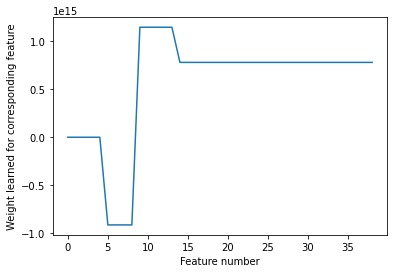

In [35]:
from matplotlib import pyplot as plt

weights = regression.coef_
plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()

# Evaluation

The Mean Squared Error(MSE) on the training data is 1,765,633,975.9648972. The MSE measures how close predicted values are to observed values. Within the context of this dataset, an MSE of 1,765,633,975 means that the average of the squared errors can on average deviate from the actual value by +- 1.76 billion. This is a large deviation. This may also insinuate that different variables may need to be added or detracted. The Mean Absolute Error(MAE) on training data is 23376.135273972603. The MAE value means the predicted value for sales price can on average deviate from the actual value by 23376 (+- 23 thousand USD). Within the context of this dataframe (Boston housing market) an increase or decrease of 23 thousand is not extreme. As, the median house price is $849 K. The Pearson Correlation Coefficient between training and test data is (0.9069686338128045, 6.163475013899321e-56). The correlation between the predicted and actual values is 0.90 which means that there is a strong positive association between the two values. This value insinuates that if there was an increase in one variable it would correspond to an increase in the second variable.

A visual analysis of the features by weight reveals several patterns. Features 0-4 have a plotted weight of around 0. This is interpreted as the linear regression model being unable to find a linear relationship between the dependent features and sales price. Whereas, Features 5-8 display a negative value for their corresponding weight and Features 9- 39 are plotted as having a positive relationship. I would recommend that the model is trained further before a realtor uses it. I believe that the model should be trained further in order to reduce the MSE and MAE before dependent use. There are still several features that do not have a strong predictive power in terms of housing predictions as demonstrated by the variables that fall on the negative or zero scale. The model can be used to generate an understanding of purchasing power but those numbers should be verified through additional outside research.